In [157]:
## missig values questions
import pandas as pd
import numpy as np

In [158]:
marks = pd.read_csv('class-grades.csv')
marks.head()

,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final
0,5,57.14,34.09,64.38,51.48,52.50
1,8,95.05,105.49,67.50,99.07,68.33
2,8,83.70,83.17,30.00,63.15,48.89
3,7,81.22,96.06,49.38,105.93,80.56
4,8,91.32,93.64,95.00,107.41,73.89


In [159]:
print(marks.Prefix.isnull().sum())
print(marks.Assignment.isnull().sum())
print(marks.Tutorial.isnull().sum())
print(marks.Midterm.isnull().sum())
print(marks.TakeHome.isnull().sum())
print(marks.Final.isnull().sum())

# total datset how many columns and how many missing values of each column u can find like below
print(marks.isnull().sum())

0
2
12
16
9
5
Prefix         0
Assignment     2
Tutorial      12
Midterm       16
TakeHome       9
Final          5
dtype: int64


In [160]:
## removing missing values of rows which has 5 missing values , by default it ill take column if give axis=1 take row
marks = marks[~(marks.isnull().sum(axis=1)==5)]
marks
print(marks.isnull().sum())

Prefix         0
Assignment     0
Tutorial      10
Midterm       14
TakeHome       7
Final          3
dtype: int64


In [161]:
import pandas as pd

customer = pd.read_csv('cust_dimen.csv')
#customer['Cust_id'] = customer['Cust_id'].replace('Cust_', '', regex=True)
customer['Cust_id'] = customer['Cust_id'].apply(lambda x : x[5:])
customer

,Customer_Name,Province,Region,Customer_Segment,Cust_id
0,MUHAMMED MACINTYRE,NUNAVUT,NUNAVUT,SMALL BUSINESS,1
1,BARRY FRENCH,NUNAVUT,NUNAVUT,CONSUMER,2
2,CLAY ROZENDAL,NUNAVUT,NUNAVUT,CORPORATE,3
3,CARLOS SOLTERO,NUNAVUT,NUNAVUT,CONSUMER,4
4,CARL JACKSON,NUNAVUT,NUNAVUT,CORPORATE,5
...,...,...,...,...,...
1827,NICOLE BRENNAN,ALBERTA,WEST,CONSUMER,1828
1828,JASON FORTUNE,ALBERTA,WEST,CORPORATE,1829
1829,HARRY GREENE,ALBERTA,WEST,CORPORATE,1830
1830,GRANT DONATELLI,ALBERTA,WEST,CONSUMER,1831


In [162]:
import pandas as pd
rating = pd.read_csv('rating_final.csv')
print(rating.shape)

#find duplicate rows
rating_update  = rating[rating.duplicated()]
print(rating_update.shape)
#drop duplicate rows
drop_duplicate = rating.drop_duplicates()
drop_duplicate.shape

(1254, 5)
(105, 5)


(1149, 5)

In [163]:
# Numerical and Data Analysis
import numpy as np
import pandas as pd

#Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# extra - To supress warnings
import warnings
warnings.filterwarnings('ignore')

In [164]:
df = pd.read_csv('titanic_dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [165]:
df.shape

(891, 12)

In [166]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [167]:
# sibsp --> sibling + spouse (passenger travelling with sibling +spouse)
#Parch--> Parent + Child(If 2 means travelling with parent & child or both parents)
#Embarked --> Boarding Station

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Missing Value Check

In [169]:
# Percentage of missing values
#Identification of Missing values
100*df.isnull().mean() #preferred to use % of missing values
#df.isnull().sum() # gives count

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

##### cabin --> very high % of missing -->Prefer to exclude the column from the analysis
##### Age --> Medium % of missing --> Impute with mean/median/mode
##### Embarked --> Verylow % of missing --> Imputation or exclude rows with missing values

#####Numiracl column --> Mean/Median
#####Categorical Column --> Mode
###### Any column having hig %(generally > 40%) should not consider for analysis

In [170]:
df1 = df.drop('Cabin',axis=1)
100*df1.isnull().mean()
## If mean and median very for from each other use median,but if mean ,median close use mean
df1["Age"].mean(),df1['Age'].median()
med=df1["Age"].median()
df1["Age"]=df1["Age"].fillna(med)

In [171]:
100*df1.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.224467
dtype: float64

In [172]:
df2 = df1[df1["Embarked"].notna()]# exclude null rows
100*df2.isnull().mean()

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [173]:
df2.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [174]:
df2["SibSp"].nunique(),df2["Parch"].nunique() # less unquine numbers so condider catogrical columns

(7, 7)

In [175]:
num_cols=["Age","Fare"]
cat_clos=["Survived","Pclass","Sex","SibSp","Parch","Embarked"]
extra_cols=["PassengerId","Name","Ticket"]
len(num_cols)+len(cat_clos)+len(extra_cols)

11

In [176]:
df2.shape

(889, 11)

### Univariate Analysis

### Categorical

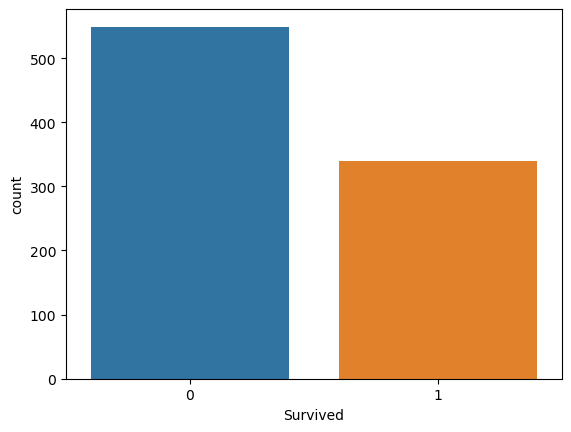

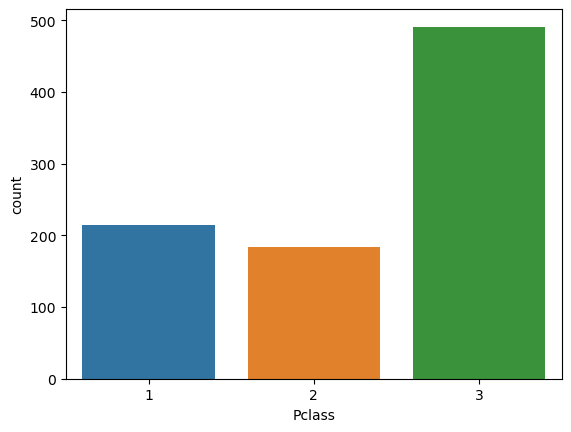

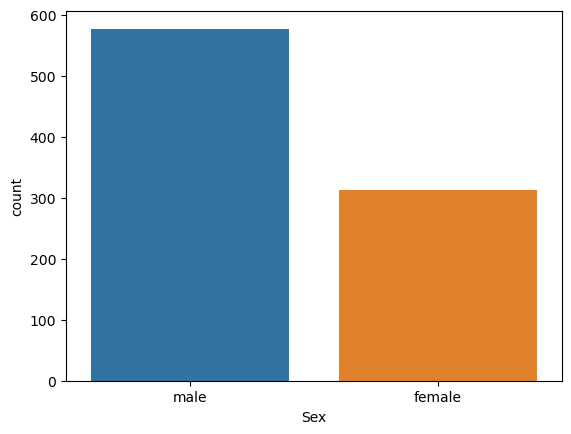

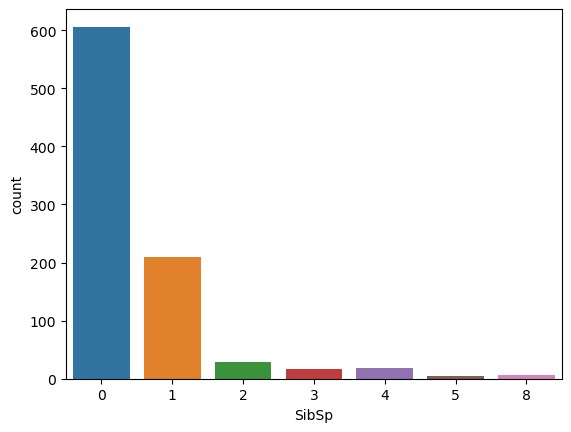

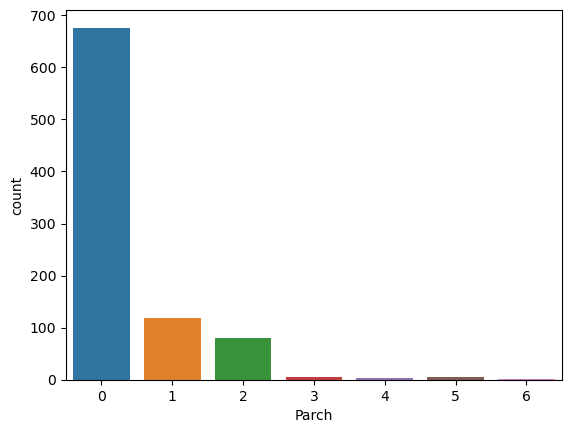

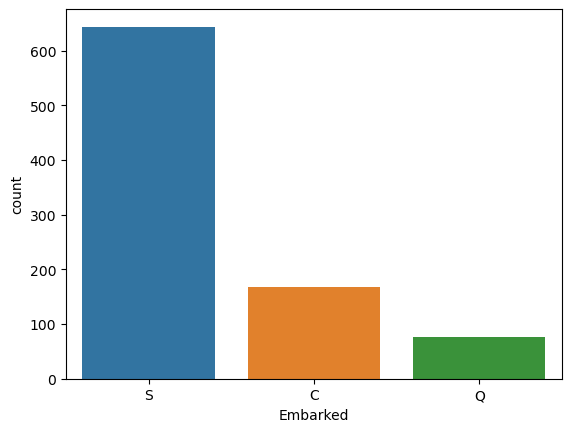

In [177]:
# univariate means analysis with single value
for col in cat_clos:
    sns.countplot(x=df2[col])
    plt.show()

#### Numerical

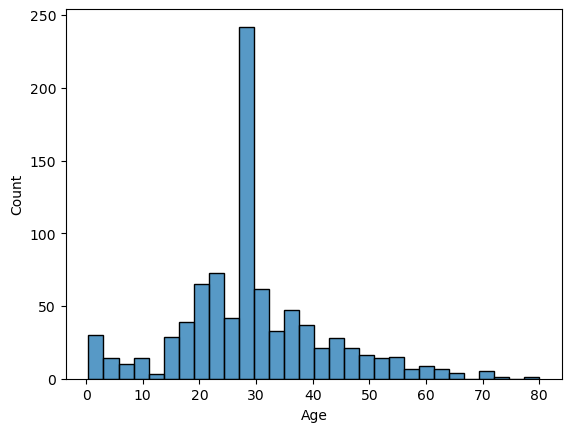

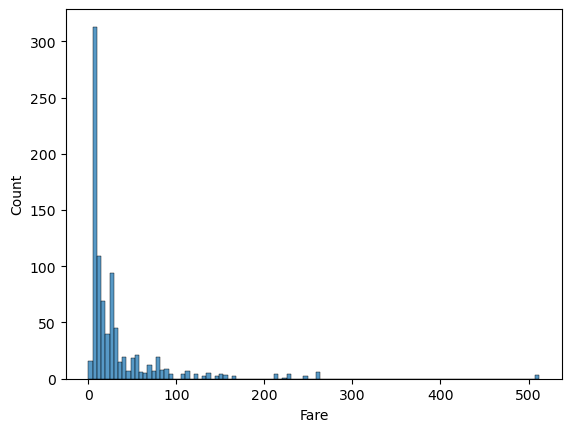

In [178]:
for col in num_cols:
    sns.histplot(x=df2[col])
    plt.show()

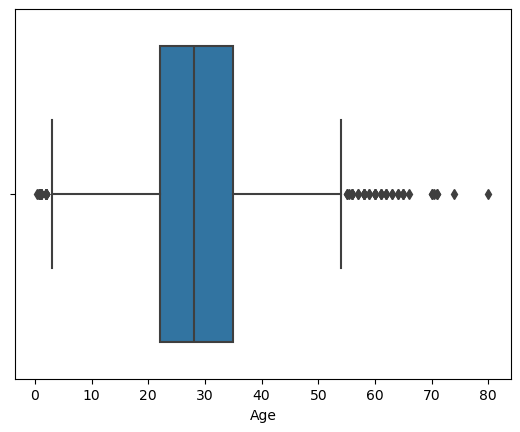

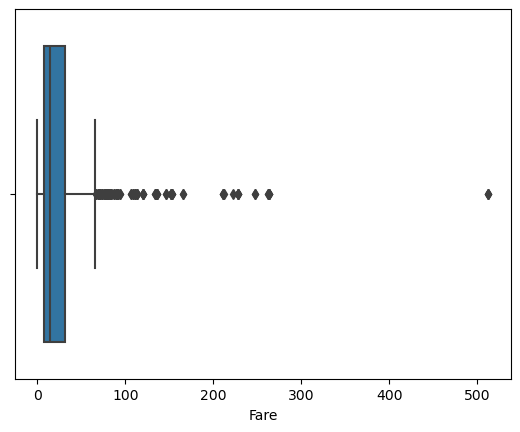

In [179]:
for col in num_cols:
    sns.boxplot(x=df2[col])
    plt.show()

## Upper whisker : Q3+1.5*(Q3-Q1)
## Lower Whisker : Q1-1.58(Q3-Q1)
## IQR : Q3-Q1

### Bivariate Analysis

##### two variable analysis
##### Numiracl Vs Numerical

##### scatter plot use of numrical columns

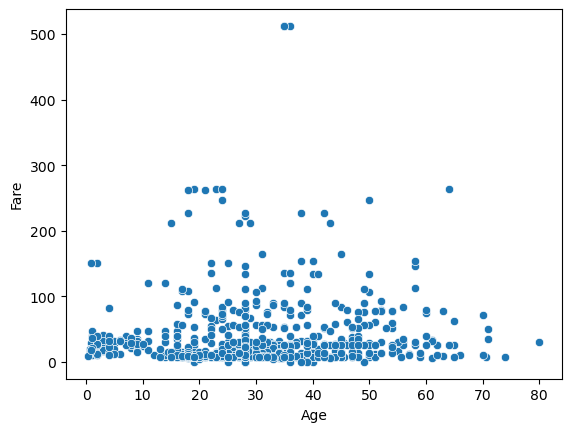

In [180]:
sns.scatterplot(x=df2["Age"],y=df2["Fare"])
plt.show()

In [181]:
# Positve Releationship --> if x1 is increasing x2 also increasing
# Negative Releationship --> If x1 is increasing x2 decreasing
# No Releationship --> Id=f x1 & x2 have no releationship

### Numerical Vs Categorical

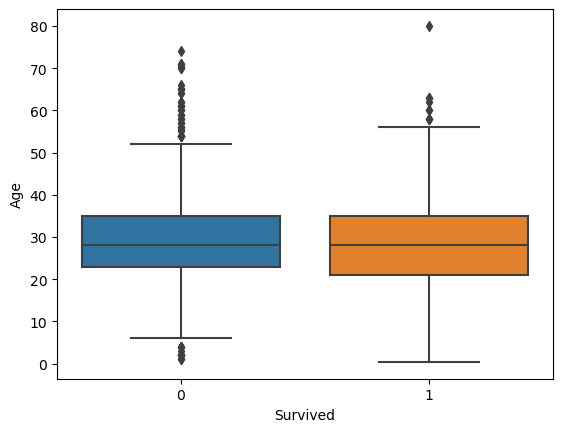

In [182]:
sns.boxplot(x=df2['Survived'],y=df2['Age'])
plt.show()

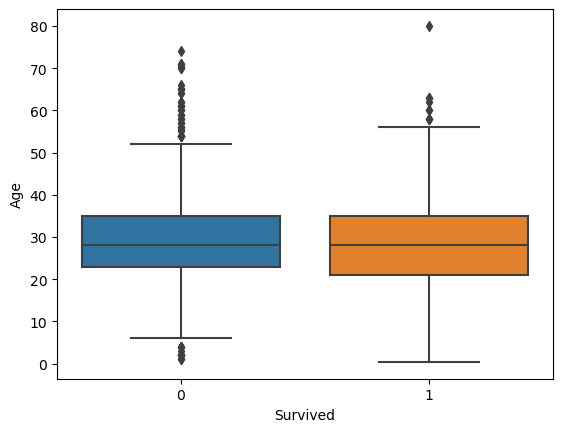

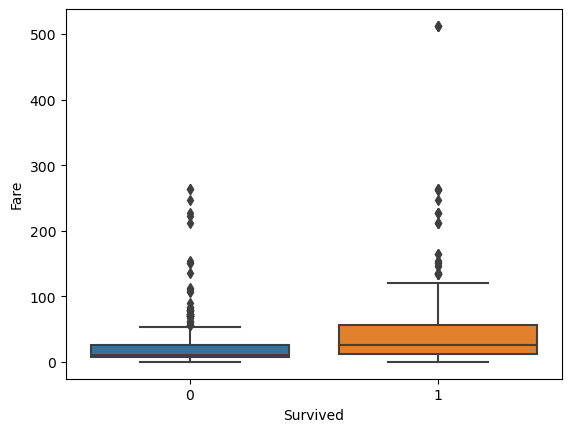

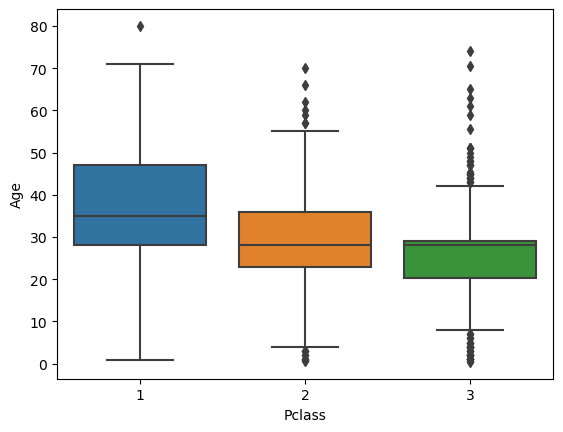

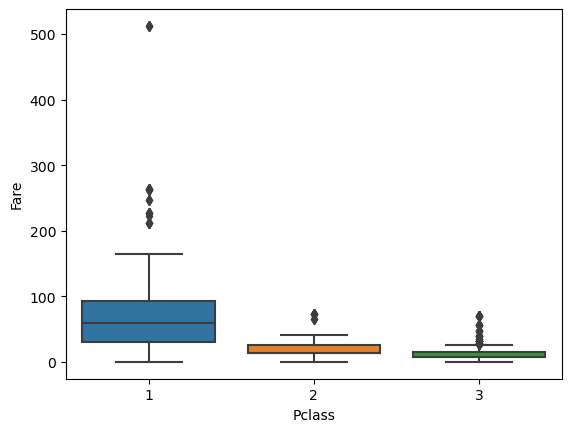

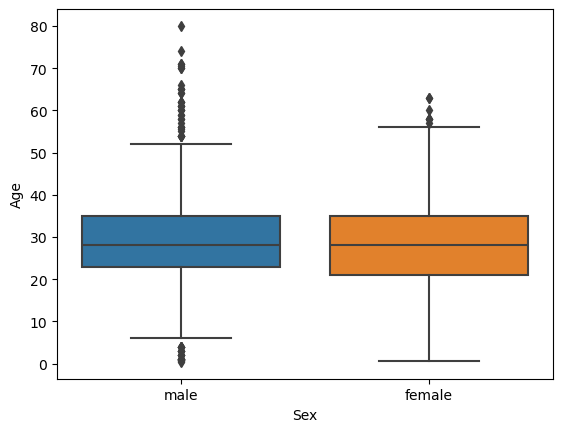

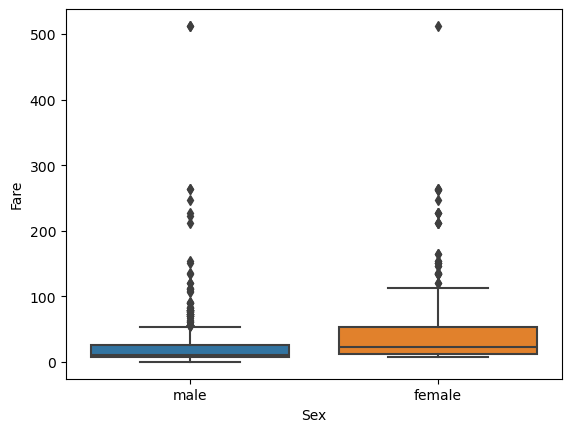

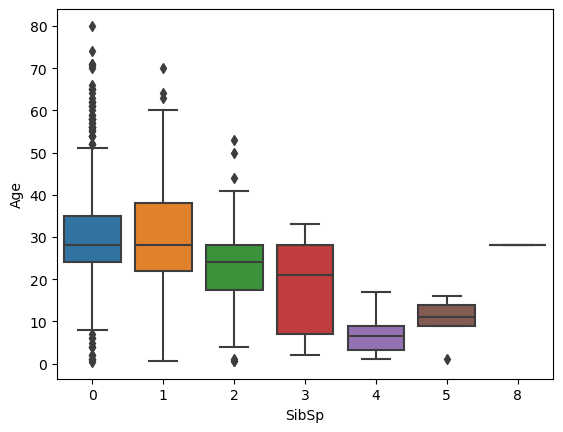

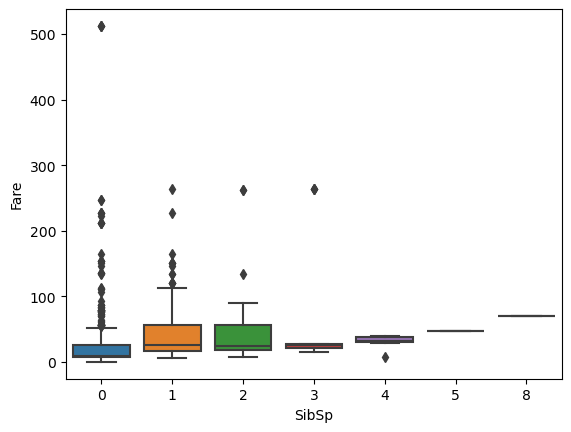

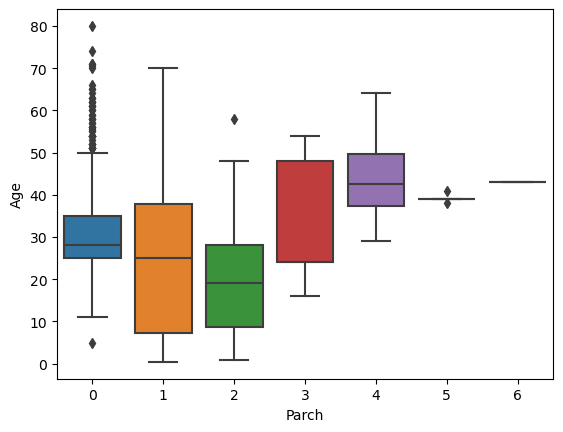

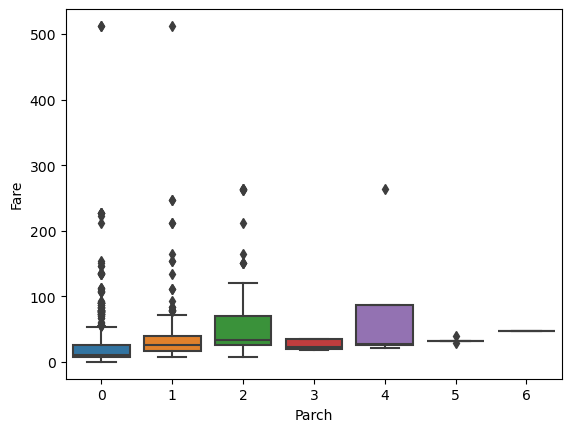

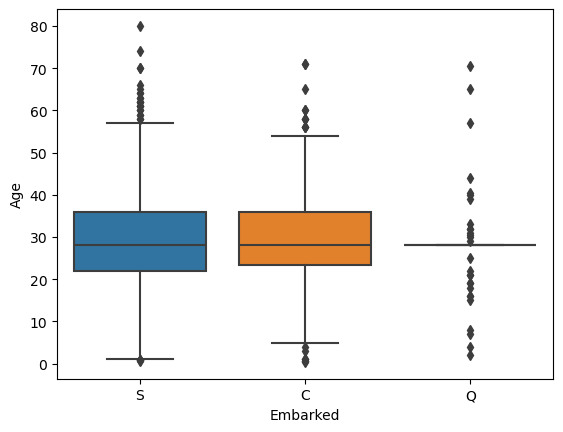

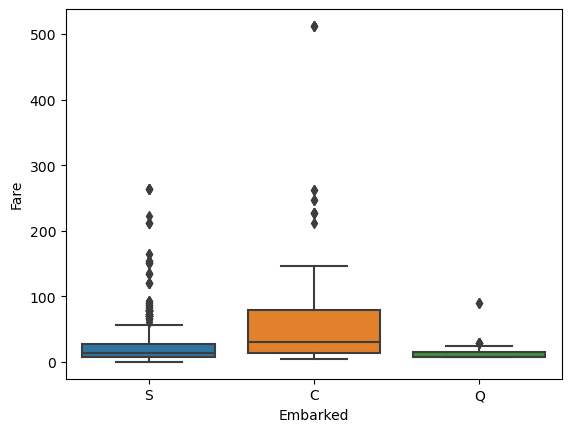

In [183]:
for col1 in cat_clos:
    for col2 in num_cols:
        sns.boxplot(x=df2[col1],y=df2[col2])
        plt.show()

### Multivariate Analysis
##### most popular heat map(only numerical coumns)

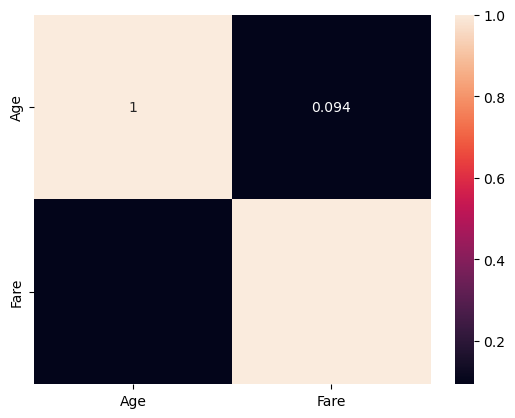

In [184]:
sns.heatmap(df2[num_cols].corr(),annot=True)
plt.show()

## Correlation represents strength of relationship between variables
## Correlation lies in the range of -1 to 1 
## Negative correlation (0 to -1) shows inverse relationship 
## Positive correlation (0 to 1) shows direct relationship 
## 0 correlation represents no relationship.
## annot for better readbility

In [185]:
## H/W
## Cat Vs Cat (Bivariate)

### Tendulkar's ODI batting analysis

In [186]:
# Numerical and Data Analysis
import numpy as np
import pandas as pd

#Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# extra - To supress warnings
import warnings
warnings.filterwarnings('ignore')

In [187]:
st = pd.read_csv('tendulkar_ODI.csv')
st

,Unnamed: 0,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,1,0,-,2,0,0,0,5,caught,2,v Pakistan,Gujranwala,18-Dec-89
1,2,0,2,2,0,0,0,5,caught,2,v New Zealand,Dunedin,1-Mar-90
2,3,36,51,39,5,0,92.3,6,caught,1,v New Zealand,Wellington,6-Mar-90
3,4,19,38,35,1,1,54.28,4,bowled,2,v England,Leeds,18-Jul-90
4,5,31,31,26,3,0,119.23,6,bowled,2,v England,Nottingham,20-Jul-90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,291,18,21,14,2,0,128.57,2,caught,2,v Sri Lanka,Mumbai,2-Apr-11
291,292,2,9,6,0,0,33.33,2,caught,2,v Australia,Melbourne,5-Feb-12
292,293,3,21,12,0,0,25,2,caught,2,v Australia,Brisbane,19-Feb-12
293,294,14,34,15,2,0,93.33,2,run out,2,v Australia,Sydney,26-Feb-12


In [188]:
#Plot a bar chart showing runs scored on the x-axis and frequency/count on the y-axis. In which bucket has he scored runs the most often?
st.Runs.isnull().sum()

0

In [189]:
st['Runs'].value_counts()
#st['Runs'] = st['Runs'].apply(lambda x : x[:-1])
st['Runs'] = st['Runs'].str.replace('*', '', regex=False)
print(st.shape)
st1 = st[~st['Runs'].isin(['DNB', 'TDNB'])]
print(st1.shape)

(295, 13)
(292, 13)


In [190]:
st1.Runs = pd.to_numeric(st1['Runs'])
st1.Runs.dtype

dtype('int64')

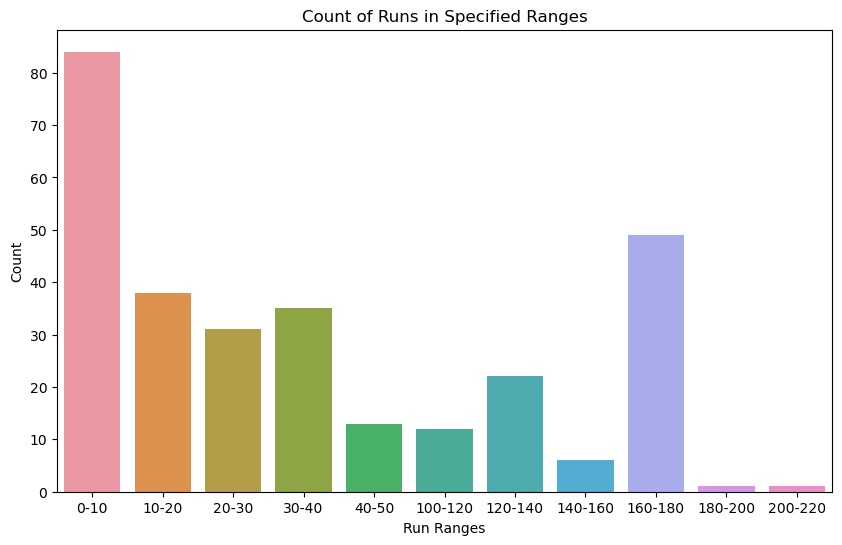

In [191]:

# Define bins and labels
bins = [0, 10, 20, 30, 40, 50,60,70,80,180,200,220]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50','100-120','120-140','140-160','160-180','180-200','200-220']

# Create a new column with binned data
st1['run_range'] = pd.cut(st1['Runs'], bins=bins, labels=labels, right=False)

# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=st1, x='run_range')

# Add labels and title
plt.xlabel('Run Ranges')
plt.ylabel('Count')
plt.title('Count of Runs in Specified Ranges')

# Show the plot
plt.show()


In [192]:
#Plot a histogram of the number of 4s hit by Tendulkar. What is the most common value of the variable X, where X represents the number of 4s hit by him?
st1['4s'].isnull().sum()

0

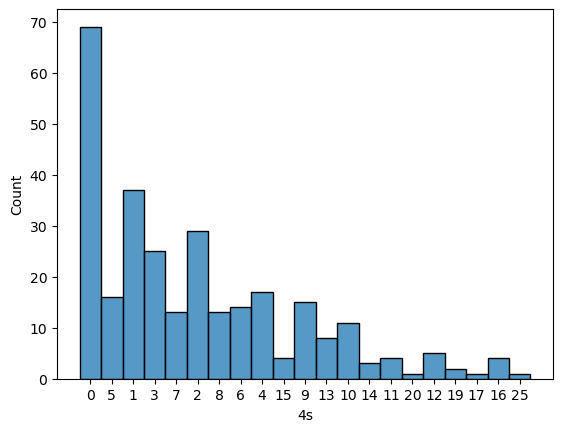

In [193]:
sns.histplot(data=st1, x='4s')
plt.show()

In [194]:
news = pd.read_csv("popularity.csv")
news.head()
news.columns
#news[' num_keywords'].mode()
print(news[' shares'].mean())
print(news[' shares'].median())
print(news[' shares'].describe())

3395.3801836343455
1400.0
count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name:  shares, dtype: float64


### Graded Questions

In [195]:
news1 = pd.read_csv('popularity.csv')
news1.head()
news1.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [196]:
news1[' shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name:  shares, dtype: float64

In [197]:
## find specific % how many shares lies 
news1[' shares'].quantile(.80)

3400.0

In [198]:
print(news1.shape)
P = np.percentile(news1[' shares'], [5, 95])
news3 = news1[(news1[' shares'] > P[0]) & (news1[' shares'] < P[1])]
news3[' shares'].describe()
print(news3.shape)

(39644, 61)
(35660, 61)


In [199]:
##caliculate percentage of outliers removed
initial_count = news1.shape[0]
final_count = news3.shape[0]
print(final_count)
percentage_removed = ((initial_count-final_count) / initial_count)*100
print(percentage_removed)

35660
10.049440016143679


### Segmented Univariate Analysis

In [200]:
nas = pd.read_csv('EDA_nas.csv')
nas.head()

,STUID,State,District,Gender,Age,Category,Same.language,Siblings,Handicap,Father.edu,...,Express.science.views,Watch.TV,Read.magazine,Read.a.book,Play.games,Help.in.household,Maths..,Reading..,Science..,Social..
0,26011001001,Maharashtra,1,Girl,13 years,3.0,2.0,1 sibling,No,Illiterate,...,Agree,Every day,Never,Once a month,Once a week,Every day,NaN,33.33,NaN,NaN
1,26011001002,Maharashtra,1,Girl,15 years,3.0,2.0,3 siblings,No,NaN,...,Agree,Once a week,Never,Never,Once a week,Every day,NaN,62.07,NaN,NaN
2,26011001003,Maharashtra,1,Girl,14 years,3.0,2.0,3 siblings,No,Degree & above,...,Agree,Every day,Once a month,Once a month,Once a week,Every day,NaN,41.38,NaN,NaN
3,26011001004,Maharashtra,1,Boy,13 years,3.0,2.0,3 siblings,No,Secondary,...,Agree,Every day,Every day,Never,Every day,Every day,29.82,NaN,NaN,NaN
4,26011001005,Maharashtra,1,Girl,14 years,3.0,2.0,2 siblings,No,Primary,...,Neither,Never,Never,Once a month,Once a week,Every day,NaN,NaN,27.27,NaN


In [201]:
nas['Watch.TV'].value_counts()

Watch.TV
Every day       6621
Once a week     1479
Never            348
Once a month     309
Name: count, dtype: int64

In [202]:
nas.columns

Index(['STUID', 'State', 'District', 'Gender', 'Age', 'Category',
       'Same.language', 'Siblings', 'Handicap', 'Father.edu', 'Mother.edu',
       'Father.occupation', 'Mother.occupation', 'Below.poverty',
       'Use.calculator', 'Use.computer', 'Use.Internet', 'Use.dictionary',
       'Read.other.books', 'X..Books', 'Distance', 'Computer.use',
       'Library.use', 'Like.school', 'Subjects', 'Give.Lang.HW',
       'Give.Math.HW', 'Give.Scie.HW', 'Give.SoSc.HW', 'Correct.Lang.HW',
       'Correct.Math.HW', 'Correct.Scie.HW', 'Correct.SocS.HW',
       'Help.in.Study', 'Private.tuition', 'English.is.difficult',
       'Read.English', 'Dictionary.to.learn', 'Answer.English.WB',
       'Answer.English.aloud', 'Maths.is.difficult', 'Solve.Maths',
       'Solve.Maths.in.groups', 'Draw.geometry', 'Explain.answers',
       'SocSci.is.difficult', 'Historical.excursions', 'Participate.in.SocSci',
       'Small.groups.in.SocSci', 'Express.SocSci.views',
       'Science.is.difficult', 'Observe.

In [203]:
nas['Science..'].value_counts()

Science..
34.55    286
30.91    278
32.73    269
29.09    268
27.27    257
36.36    227
38.18    216
23.64    214
25.45    204
40.00    185
21.82    151
43.64    144
45.45    138
41.82    130
20.00    114
50.91    111
49.09    106
47.27     97
54.55     85
52.73     84
18.18     66
16.36     62
58.18     47
60.00     46
56.36     45
14.55     35
63.64     30
61.82     26
65.45     24
69.09     23
72.73     21
67.27     21
12.73     20
74.55     14
70.91     14
10.91     13
80.00     11
76.36     11
9.09      10
78.18      8
7.27       8
81.82      6
5.45       5
1.82       4
85.45      3
3.64       3
0.00       3
83.64      1
Name: count, dtype: int64

In [204]:
nas['Father.edu'].value_counts()

Father.edu
Secondary         2549
Primary           2434
Illiterate        2034
Sr secondary       792
Degree & above     338
Name: count, dtype: int64

In [205]:
nas['Father.edu'].isnull().sum()

654

In [206]:
print(nas.shape)
nas = nas[~(nas['Father.edu'].isnull())]
print(nas.shape)

(8801, 64)
(8147, 64)


In [207]:
nas['Father.edu'].isnull().sum()

0

In [208]:
nas['Father.edu'].value_counts()

Father.edu
Secondary         2549
Primary           2434
Illiterate        2034
Sr secondary       792
Degree & above     338
Name: count, dtype: int64

In [209]:
nas['Maths..'].isnull().sum()

4268

In [210]:
nas['Maths..'].describe()

count    3879.000000
mean       31.708791
std        14.642729
min         0.000000
25%        22.030000
50%        28.070000
75%        36.840000
max        94.740000
Name: Maths.., dtype: float64

### Bivarital Analysis

In [211]:
df = pd.read_csv('EDA_Gold_Silver_prices.csv')
df.SilverPrice.value_counts()
df.columns

Index(['Month', 'SilverPrice', 'GoldPrice'], dtype='object')

In [212]:
df.GoldPrice.value_counts()

GoldPrice
12619.24    1
28636.08    1
52912.18    1
51344.51    1
50745.87    1
           ..
17716.56    1
17362.97    1
17859.21    1
18329.56    1
81169.45    1
Name: count, Length: 241, dtype: int64

In [213]:
correlation = df['GoldPrice'].corr(df['SilverPrice'])
correlation

0.9542559570539775

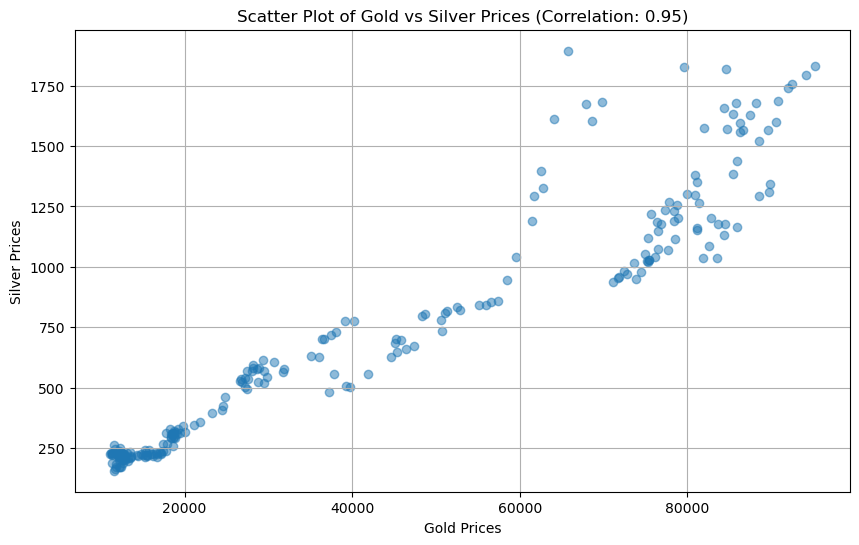

In [214]:
plt.figure(figsize=(10, 6))
plt.scatter(df['GoldPrice'], df['SilverPrice'], alpha=0.5)
plt.title(f'Scatter Plot of Gold vs Silver Prices (Correlation: {correlation:.2f})')
plt.xlabel('Gold Prices')
plt.ylabel('Silver Prices')
plt.grid(True)
plt.show()

In [215]:
df.head()

,Month,SilverPrice,GoldPrice
0,Mar-97,186.48,12619.24
1,Apr-97,170.65,12338.59
2,May-97,170.44,12314.94
3,Jun-97,169.96,12202.78
4,Jul-97,155.80,11582.07


In [216]:
import datetime

# Convert the string to a datetime object
df['Month'] = pd.to_datetime(df['Month'], format='%b-%y')

# Extract the year
df['Year'] = df['Month'].dt.year
df.head()

,Month,SilverPrice,GoldPrice,Year
0,1997-03-01,186.48,12619.24,1997
1,1997-04-01,170.65,12338.59,1997
2,1997-05-01,170.44,12314.94,1997
3,1997-06-01,169.96,12202.78,1997
4,1997-07-01,155.80,11582.07,1997


In [217]:
#find correleation for specif year
#first filter data for specific given year
# later apply correlation on sub set year specific data

# Filter the data for the specific year (e.g., 1997)
specific_year = 2008
df_specific_year = df[df['Year'] == specific_year]

# Calculate the correlation between 'Gold' and 'Silver' for the specific year
correlation = df_specific_year['GoldPrice'].corr(df_specific_year['SilverPrice'])
correlation

0.009583757463369392

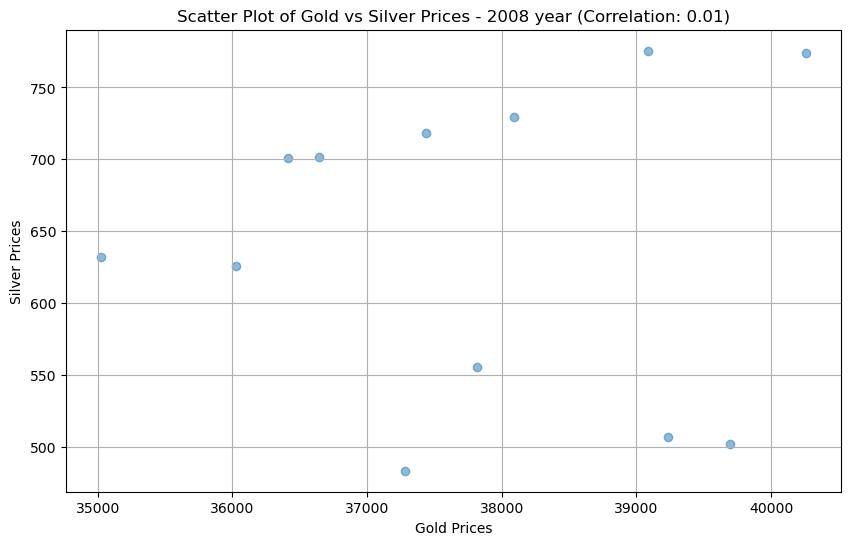

In [218]:
plt.figure(figsize=(10, 6))
plt.scatter(df_specific_year['GoldPrice'], df_specific_year['SilverPrice'], alpha=0.5)
plt.title(f'Scatter Plot of Gold vs Silver Prices - 2008 year (Correlation: {correlation:.2f})')
plt.xlabel('Gold Prices')
plt.ylabel('Silver Prices')
plt.grid(True)
plt.show()

In [219]:
cur = pd.read_csv('currencies.csv')
cur.head()
cur.columns


Index(['Currency', 'Chinese Yuan', 'Euro', 'Japanese Yen',
       'U.K. Pound Sterling', 'U.S. Dollar', 'Algerian Dinar',
       'Australian Dollar', 'Bahrain Dinar', 'Botswana Pula', 'Brazilian Real',
       'Brunei Dollar', 'Canadian Dollar', 'Chilean Peso', 'Colombian Peso',
       'Czech Koruna', 'Danish Krone', 'Hungarian Forint', 'Icelandic Krona',
       'Indian Rupee', 'Indonesian Rupiah', 'Iranian Rial',
       'Israeli New Sheqel', 'Kazakhstani Tenge', 'Korean Won',
       'Kuwaiti Dinar', 'Libyan Dinar', 'Malaysian Ringgit', 'Mauritian Rupee',
       'Mexican Peso', 'Nepalese Rupee', 'New Zealand Dollar',
       'Norwegian Krone', 'Rial Omani', 'Pakistani Rupee', 'Nuevo Sol',
       'Philippine Peso', 'Polish Zloty', 'Qatar Riyal', 'Russian Ruble',
       'Saudi Arabian Riyal', 'Singapore Dollar', 'South African Rand',
       'Sri Lanka Rupee', 'Swedish Krona', 'Swiss Franc', 'Thai Baht',
       'Trinidad And Tobago Dollar', 'Tunisian Dinar', 'U.A.E. Dirham',
       'Peso Ur

In [220]:
selected_columns = ['Indian Rupee', 'U.S. Dollar','Australian Dollar','Euro', 'Japanese Yen','U.K. Pound Sterling']
new_df = cur[selected_columns]
new_df.head()

,Indian Rupee,U.S. Dollar,Australian Dollar,Euro,Japanese Yen,U.K. Pound Sterling
0,94.1451,1.39596,1.87126,1.25367,143.645,1.05054
1,94.1513,1.39684,1.85825,1.25322,142.715,1.06143
2,NaN,1.39286,1.87313,1.25834,140.540,1.07300
3,94.0345,1.39316,1.85236,1.25737,140.640,1.06911
4,93.9408,1.39257,1.85974,1.25797,140.510,1.07261


In [221]:
new_df.corr()

,Indian Rupee,U.S. Dollar,Australian Dollar,Euro,Japanese Yen,U.K. Pound Sterling
Indian Rupee,1.000000,0.872862,0.921475,0.243851,-0.270123,0.314681
U.S. Dollar,0.872862,1.000000,0.607010,-0.210587,0.210295,-0.042303
Australian Dollar,0.921475,0.607010,1.000000,0.331588,-0.582032,0.579213
Euro,0.243851,-0.210587,0.331588,1.000000,-0.645719,0.531150
Japanese Yen,-0.270123,0.210295,-0.582032,-0.645719,1.000000,-0.970308
U.K. Pound Sterling,0.314681,-0.042303,0.579213,0.531150,-0.970308,1.000000


0.8728617382644617
0.9214754518981337
0.24385071994533072
-0.27012349155025495


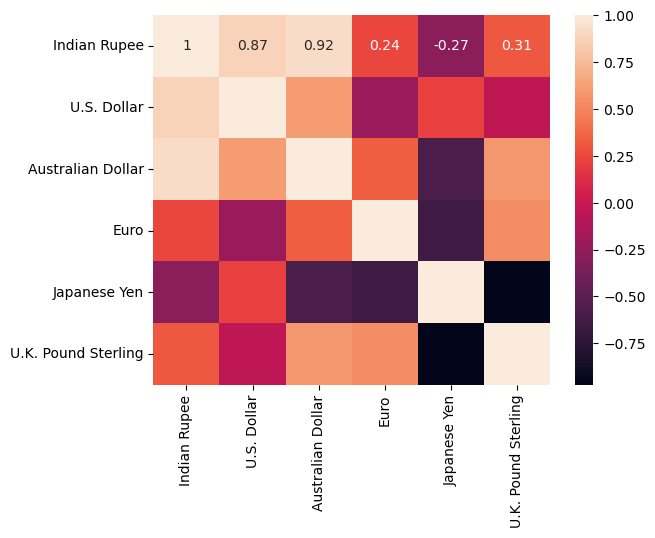

In [222]:
import matplotlib.pyplot as plt

import seaborn as sns



# caliculate individual correlation to understan better
#selected_columns = ['Indian Rupee', 'U.S. Dollar','Australian Dollar','Euro', 'Japanese Yen']

print(new_df['Indian Rupee'].corr(new_df['U.S. Dollar']))
print(new_df['Indian Rupee'].corr(new_df['Australian Dollar']))
print(new_df['Indian Rupee'].corr(new_df['Euro']))
print(new_df['Indian Rupee'].corr(new_df['Japanese Yen']))


corr = new_df.corr()
sns.heatmap(corr, annot=True,
	            xticklabels=corr.columns.values,
	            yticklabels=corr.columns.values)
#plt.figure(figsize=(10, 8))
#sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()


In [227]:
ns = pd.read_csv('nas.csv')
ns

,STUID,State,District,Gender,Age,Category,Same.language,Siblings,Handicap,Father.edu,...,Express.science.views,Watch.TV,Read.magazine,Read.a.book,Play.games,Help.in.household,Maths..,Reading..,Science..,Social..
0,26011001001,Maharashtra,1,Girl,13 years,3.0,2.0,1 sibling,No,Illiterate,...,Agree,Every day,Never,Once a month,Once a week,Every day,NaN,33.33,NaN,NaN
1,26011001002,Maharashtra,1,Girl,15 years,3.0,2.0,3 siblings,No,NaN,...,Agree,Once a week,Never,Never,Once a week,Every day,NaN,62.07,NaN,NaN
2,26011001003,Maharashtra,1,Girl,14 years,3.0,2.0,3 siblings,No,Degree & above,...,Agree,Every day,Once a month,Once a month,Once a week,Every day,NaN,41.38,NaN,NaN
3,26011001004,Maharashtra,1,Boy,13 years,3.0,2.0,3 siblings,No,Secondary,...,Agree,Every day,Every day,Never,Every day,Every day,29.82,NaN,NaN,NaN
4,26011001005,Maharashtra,1,Girl,14 years,3.0,2.0,2 siblings,No,Primary,...,Neither,Never,Never,Once a month,Once a week,Every day,NaN,NaN,27.27,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8796,26141270036,Maharashtra,14,Boy,13 years,4.0,1.0,1 sibling,No,Secondary,...,Agree,Every day,Every day,Once a week,Every day,Every day,NaN,NaN,34.55,30.61
8797,26141270037,Maharashtra,14,Boy,13 years,3.0,1.0,2 siblings,No,NaN,...,Agree,Every day,Every day,Once a week,Once a week,Once a month,16.95,46.67,NaN,NaN
8798,26141270038,Maharashtra,14,Boy,14 years,4.0,1.0,1 sibling,No,Sr secondary,...,Agree,Every day,Every day,Once a week,Every day,Every day,24.56,55.17,NaN,NaN
8799,26141270039,Maharashtra,14,Boy,13 years,4.0,NaN,1 sibling,No,Sr secondary,...,Agree,Once a week,Once a week,Never,Every day,Every day,NaN,NaN,23.64,34.69


In [231]:
rating = pd.read_csv('rating_final.csv')
rating
#create average rating
rating['avg_rating'] = round(rating[['rating', 'food_rating', 'service_rating']].mean(axis=1))
rating

,userID,placeID,rating,food_rating,service_rating,avg_rating
0,U1077,135085,2,2,2,2.000000
1,U1077,135038,2,2,1,1.666667
2,U1077,132825,2,2,2,2.000000
3,U1077,135060,1,2,2,1.666667
4,U1068,135104,1,1,2,1.333333
...,...,...,...,...,...,...
1249,U1043,132630,1,1,1,1.000000
1250,U1011,132715,1,1,0,0.666667
1251,U1068,132733,1,1,0,0.666667
1252,U1068,132594,1,1,1,1.000000


In [232]:
odi = pd.read_csv('odi-batting.csv')
odi.head()

,Country,Player,Runs,MatchDate,Weekday,Ground,Versus,Balls
0,Afghanistan,Mohammad Shahzad,118,16-02-2010,Tue,Sharjah CA Stadium,Canada,121
1,Afghanistan,Mohammad Shahzad,110,01-09-2009,Tue,VRA Ground,Netherlands,111
2,Afghanistan,Mohammad Shahzad,100,16-08-2010,Mon,Cambusdoon New Ground,Scotland,72
3,Afghanistan,Mohammad Shahzad,82,10-07-2010,Sat,Hazelaarweg,Netherlands,108
4,Afghanistan,Mohammad Shahzad,57,01-07-2010,Thu,Sportpark Westvliet,Canada,57


In [241]:
odi1 = odi[['Player','Runs']]
odi2 = odi1[(((odi1['Player']=='Sachin R Tendulkar') & (odi1['Runs']>99))|((odi1['Player']=='Ricky T Ponting')& (odi1['Runs']>99)))]
print(odi2[((odi2['Player']=='Sachin R Tendulkar') & (odi2['Runs']>99))].count())
print(odi2[((odi2['Player']=='Ricky T Ponting') & (odi2['Runs']>99))].count())




Player    48
Runs      48
dtype: int64
Player    30
Runs      30
dtype: int64


In [242]:
odi.head()

,Country,Player,Runs,MatchDate,Weekday,Ground,Versus,Balls
0,Afghanistan,Mohammad Shahzad,118,16-02-2010,Tue,Sharjah CA Stadium,Canada,121
1,Afghanistan,Mohammad Shahzad,110,01-09-2009,Tue,VRA Ground,Netherlands,111
2,Afghanistan,Mohammad Shahzad,100,16-08-2010,Mon,Cambusdoon New Ground,Scotland,72
3,Afghanistan,Mohammad Shahzad,82,10-07-2010,Sat,Hazelaarweg,Netherlands,108
4,Afghanistan,Mohammad Shahzad,57,01-07-2010,Thu,Sportpark Westvliet,Canada,57


In [254]:
odi.Country.value_counts()
odi_india = odi[odi['Country']=='India']
odi_india1 = odi_india[odi_india['Runs']>99]
odi_india12 = odi_india1[['Runs','MatchDate']]
odi_india12.value_counts()

odi_india12['MatchDate'] = pd.to_datetime(odi_india12['MatchDate'], format='%d-%m-%Y')

# Extract the year
odi_india12['MatchDate'] = odi_india12['MatchDate'].dt.year
odi_india12

,Runs,MatchDate
13601,200,2010
13602,186,1999
13603,175,2009
13604,163,2009
13605,152,2003
...,...,...
18180,123,2010
18181,105,2011
18244,102,1986
18467,114,1992


In [257]:
centuries_per_year_team = odi_india12.groupby(['MatchDate'])['Runs'].count().reset_index()
centuries_per_year_team.max

<bound method DataFrame.max of     MatchDate  Runs
0        1983     1
1        1984     3
2        1986     2
3        1987     4
4        1988     5
5        1989     2
6        1990     3
7        1991     2
8        1992     1
9        1993     2
10       1994     7
11       1995     1
12       1996     8
13       1997     7
14       1998    18
15       1999    15
16       2000    10
17       2001     9
18       2002     9
19       2003    10
20       2004     7
21       2005    11
22       2006     5
23       2007     5
24       2008    10
25       2009    13
26       2010    12
27       2011     8>

In [259]:
order = pd.read_csv('orders_dimen.csv')
order

,Order_ID,Order_Date,Order_Priority,Ord_id
0,3,13-10-2010,LOW,Ord_1
1,293,01-10-2012,HIGH,Ord_2
2,483,10-07-2011,HIGH,Ord_3
3,515,28-08-2010,NOT SPECIFIED,Ord_4
4,613,17-06-2011,HIGH,Ord_5
...,...,...,...,...
5501,47360,08-10-2010,NOT SPECIFIED,Ord_5502
5502,52706,09-07-2012,LOW,Ord_5503
5503,54279,30-07-2011,HIGH,Ord_5504
5504,55558,09-08-2010,MEDIUM,Ord_5505


In [260]:
order['Order_Date'] = pd.to_datetime(order['Order_Date'])

In [261]:
order['day'] = order['Order_Date'].dt.day
order.head(10)

,Order_ID,Order_Date,Order_Priority,Ord_id,day
0,3,2010-10-13,LOW,Ord_1,13
1,293,2012-10-01,HIGH,Ord_2,1
2,483,2011-07-10,HIGH,Ord_3,10
3,515,2010-08-28,NOT SPECIFIED,Ord_4,28
4,613,2011-06-17,HIGH,Ord_5,17
5,643,2011-03-24,HIGH,Ord_6,24
6,678,2010-02-26,LOW,Ord_7,26
7,807,2010-11-23,MEDIUM,Ord_8,23
8,868,2012-06-08,NOT SPECIFIED,Ord_9,8
9,933,2012-08-04,NOT SPECIFIED,Ord_10,4


### Grded Questions Defvied Metrics

In [263]:
grades = pd.read_csv('grades.csv')
grades.head()
grades.shape

(198, 2)

In [264]:
##Extract all the relevant metrics (such as the date, day, month, year, hour, and minutes) of each person’s submission 
grades.columns


Index(['submission', 'submit_time'], dtype='object')

In [266]:
grades


,submission,submit_time
0,https://ckd.upgrad.com/UpGrad/73ba5189-94fd-44...,01/03/17-20:28:52
1,https://ckd.upgrad.com/UpGrad/185242ff-7508-4c...,01/03/17-20:18:21
2,https://ckd.upgrad.com/UpGrad/a353d129-c100-43...,01/03/17-22:37:08
3,https://ckd.upgrad.com/UpGrad/002fc912-faa1-49...,01/02/17-21:43:19
4,https://ckd.upgrad.com/UpGrad/25cbc4a4-6d49-4f...,01/03/17-15:27:49
...,...,...
193,https://ckd.upgrad.com/UpGrad/ba485323-bba6-4b...,01/03/17-22:43:12
194,https://ckd.upgrad.com/UpGrad/a65694d0-339b-44...,01/09/17-23:59:34
195,https://ckd.upgrad.com/UpGrad/c3876ddf-2b2f-4a...,12/19/16-21:44:13
196,https://ckd.upgrad.com/UpGrad/2b9732ad-0985-4a...,01/09/17-23:23:06


In [267]:
#spilt file etension and placed another column

def get_file_extension(url):
    return url.split('.')[-1]

# Apply the function to the URL column
grades['file_extension'] = grades['submission'].apply(get_file_extension)
grades

,submission,submit_time,file_extension
0,https://ckd.upgrad.com/UpGrad/73ba5189-94fd-44...,01/03/17-20:28:52,zip
1,https://ckd.upgrad.com/UpGrad/185242ff-7508-4c...,01/03/17-20:18:21,zip
2,https://ckd.upgrad.com/UpGrad/a353d129-c100-43...,01/03/17-22:37:08,zip
3,https://ckd.upgrad.com/UpGrad/002fc912-faa1-49...,01/02/17-21:43:19,zip
4,https://ckd.upgrad.com/UpGrad/25cbc4a4-6d49-4f...,01/03/17-15:27:49,zip
...,...,...,...
193,https://ckd.upgrad.com/UpGrad/ba485323-bba6-4b...,01/03/17-22:43:12,zip
194,https://ckd.upgrad.com/UpGrad/a65694d0-339b-44...,01/09/17-23:59:34,zip
195,https://ckd.upgrad.com/UpGrad/c3876ddf-2b2f-4a...,12/19/16-21:44:13,zip
196,https://ckd.upgrad.com/UpGrad/2b9732ad-0985-4a...,01/09/17-23:23:06,R


In [269]:
# find percentage of .zip extensions
extension_counts = grades['file_extension'].value_counts(normalize=True) * 100
extension_counts

file_extension
zip    95.454545
R       3.535354
7z      1.010101
Name: proportion, dtype: float64

In [276]:
#first dead line - Jan 3, 2017 - 11:59:59 PM
# second dead line - Jan 9, 2017 - 11:59 PM
#How many students submitted the assignment after the first deadline (including the students who submitted after the second deadline) ?

#first change date string to date object
grades['submit_time'] = pd.to_datetime(grades['submit_time'], format='%m/%d/%y-%H:%M:%S')
grades

specific_datetime = pd.Timestamp('2017-01-03 23:59:59')

# Perform the comparison
grades['is_after'] = grades['submit_time'] > specific_datetime
## count of students submitted after first dead line
grades2 = grades[(grades['submit_time'] > specific_datetime)]
grades2.shape



(44, 4)

In [278]:
## Which date most students are submitted
grades['day'] = grades['submit_time'].dt.day
grades['day'].value_counts()

day
3     121
9      21
2      14
4      12
30      6
1       6
10      3
8       3
28      2
29      2
19      2
7       2
17      1
21      1
6       1
31      1
Name: count, dtype: int64

In [280]:
# which hour of the day most students submitted
grades['hour'] = grades['submit_time'].dt.hour
grades

,submission,submit_time,file_extension,is_after,day,hour
0,https://ckd.upgrad.com/UpGrad/73ba5189-94fd-44...,2017-01-03 20:28:52,zip,False,3,20
1,https://ckd.upgrad.com/UpGrad/185242ff-7508-4c...,2017-01-03 20:18:21,zip,False,3,20
2,https://ckd.upgrad.com/UpGrad/a353d129-c100-43...,2017-01-03 22:37:08,zip,False,3,22
3,https://ckd.upgrad.com/UpGrad/002fc912-faa1-49...,2017-01-02 21:43:19,zip,False,2,21
4,https://ckd.upgrad.com/UpGrad/25cbc4a4-6d49-4f...,2017-01-03 15:27:49,zip,False,3,15
...,...,...,...,...,...,...
193,https://ckd.upgrad.com/UpGrad/ba485323-bba6-4b...,2017-01-03 22:43:12,zip,False,3,22
194,https://ckd.upgrad.com/UpGrad/a65694d0-339b-44...,2017-01-09 23:59:34,zip,True,9,23
195,https://ckd.upgrad.com/UpGrad/c3876ddf-2b2f-4a...,2016-12-19 21:44:13,zip,False,19,21
196,https://ckd.upgrad.com/UpGrad/2b9732ad-0985-4a...,2017-01-09 23:23:06,R,True,9,23


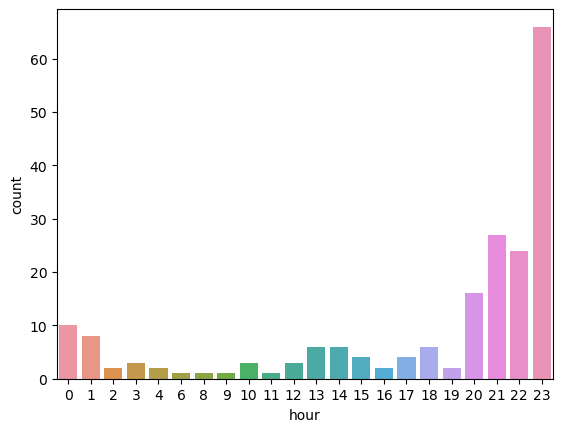

In [281]:
# submission distribution by hour 
sns.countplot(x=grades['hour'])
plt.show()